# title: "Dementia Prediction with Tree-based Models and comparison of the models"

In [4]:
install.packages("PerformanceAnalytics",repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("cowplot",repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("caret",repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("rpart.plot",dependencies = TRUE,repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("gbm",dependencies = TRUE,repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("Metrics",dependencies = TRUE,repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("vtreat",dependencies = TRUE,repos = "http://cran.us.r-project.org",quiet = TRUE)
install.packages("AUC",dependencies = TRUE,repos = "http://cran.us.r-project.org",quiet = TRUE)

Warning message:
"package 'PerformanceAnalytics' is in use and will not be installed"Warning message:
"package 'cowplot' is in use and will not be installed"Warning message:
"package 'caret' is in use and will not be installed"Warning message:
"package 'rpart.plot' is in use and will not be installed"Warning message:
"package 'gbm' is in use and will not be installed"Warning message:
"package 'Metrics' is in use and will not be installed"Warning message:
"package 'vtreat' is in use and will not be installed"Warning message:
"package 'AUC' is in use and will not be installed"

In [2]:
library(ggplot2,quietly = TRUE)
library(dplyr,quietly = TRUE)
library(Hmisc,quietly = TRUE)
library(PerformanceAnalytics,quietly = TRUE)
library(cowplot,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(e1071,quietly = TRUE)
library(randomForest,quietly = TRUE)
library(gbm,quietly = TRUE)
library(Metrics,quietly = TRUE)
library(vtreat,quietly = TRUE)
library(AUC,quietly = TRUE)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"package 'PerformanceAnalytics' was built under R version 3.5.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

Warning message:
"package 'cowplot' was built under R version 3.5.2"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Warning message:
"package 'caret' was built u

In [3]:
set.seed(123)
setwd("C:/softwares/R Programs/Data Science concepts")
data<-read.csv("oasis_longitudinal.csv",header = TRUE,na.strings = c(" ",""))

In [4]:
glimpse(data)

Observations: 373
Variables: 15
$ Subject.ID <fct> OAS2_0001, OAS2_0001, OAS2_0002, OAS2_0002, OAS2_0002, O...
$ MRI.ID     <fct> OAS2_0001_MR1, OAS2_0001_MR2, OAS2_0002_MR1, OAS2_0002_M...
$ Group      <fct> Nondemented, Nondemented, Demented, Demented, Demented, ...
$ Visit      <int> 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 4, 1, 2, 1, 2, 1, 2,...
$ MR.Delay   <int> 0, 457, 0, 560, 1895, 0, 538, 0, 1010, 1603, 0, 518, 128...
$ M.F        <fct> M, M, M, M, M, F, F, M, M, M, M, M, M, F, F, M, M, F, F,...
$ Hand       <fct> R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R,...
$ Age        <int> 87, 88, 75, 76, 80, 88, 90, 80, 83, 85, 71, 73, 75, 93, ...
$ EDUC       <int> 14, 14, 12, 12, 12, 18, 18, 12, 12, 12, 16, 16, 16, 14, ...
$ SES        <int> 2, 2, NA, NA, NA, 3, 3, 4, 4, 4, NA, NA, NA, 2, 2, 2, 2,...
$ MMSE       <int> 27, 30, 23, 28, 22, 28, 27, 28, 29, 30, 28, 27, 27, 30, ...
$ CDR        <dbl> 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1...
$ eTIV       <int> 1

In [5]:
describe(data)

data 

 15  Variables      373  Observations
--------------------------------------------------------------------------------
Subject.ID 
       n  missing distinct 
     373        0      150 

lowest : OAS2_0001 OAS2_0002 OAS2_0004 OAS2_0005 OAS2_0007
highest: OAS2_0182 OAS2_0183 OAS2_0184 OAS2_0185 OAS2_0186
--------------------------------------------------------------------------------
MRI.ID 
       n  missing distinct 
     373        0      373 

lowest : OAS2_0001_MR1 OAS2_0001_MR2 OAS2_0002_MR1 OAS2_0002_MR2 OAS2_0002_MR3
highest: OAS2_0185_MR2 OAS2_0185_MR3 OAS2_0186_MR1 OAS2_0186_MR2 OAS2_0186_MR3
--------------------------------------------------------------------------------
Group 
       n  missing distinct 
     373        0        3 
                                              
Value        Converted    Demented Nondemented
Frequency           37         146         190
Proportion       0.099       0.391       0.509
---------------------------------------------------

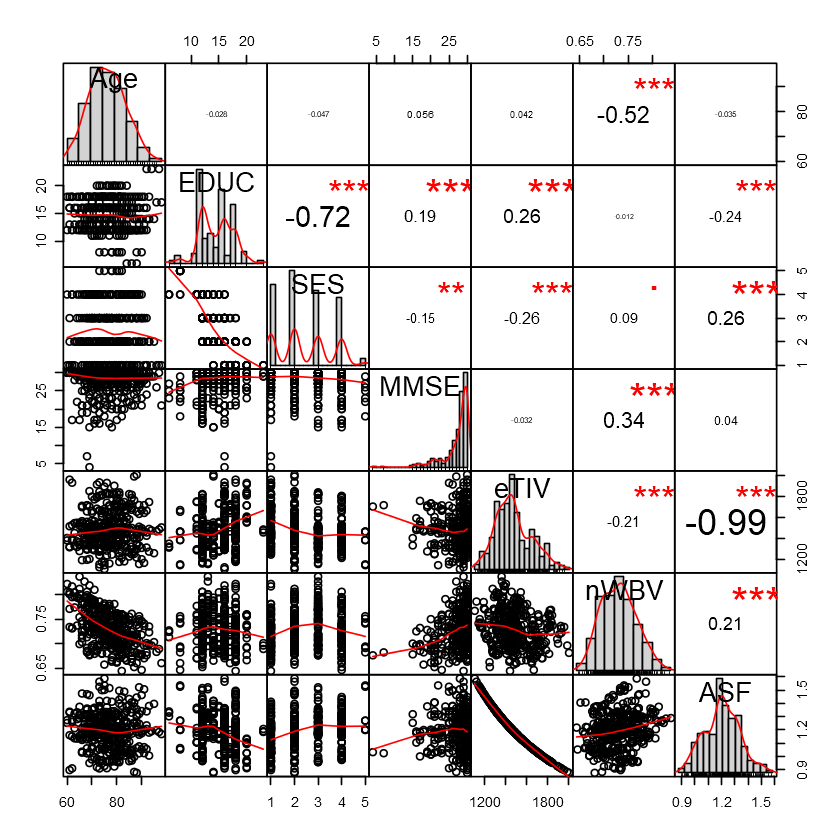

In [6]:
# chart.correlation is of PerformanceAnalytics package creates visulization of correlation matrix
chart.Correlation(select(data, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF), histogram = TRUE, main = "Correlation between Variables")

In [7]:
################## Data manipulation####################
data <- select(data, -Hand) #drop Hand column since all objects were right-handed
data$SES[is.na(data$SES)] <- median(data$SES, na.rm = TRUE) ##replacing NA with median value for SES column
data$MMSE[is.na(data$MMSE)] <- median(data$MMSE, na.rm = TRUE)

In [8]:
########creating new column with Dementia diagnosis based on logic if CDR is >0 then dementia is 1
data$Dementia <- 0
data$Dementia[data$CDR == 0] <- 0
data$Dementia[data$CDR > 0] <- 1
data$Dementia <- as.factor(data$Dementia)

In [9]:
glimpse(data)

Observations: 373
Variables: 15
$ Subject.ID <fct> OAS2_0001, OAS2_0001, OAS2_0002, OAS2_0002, OAS2_0002, O...
$ MRI.ID     <fct> OAS2_0001_MR1, OAS2_0001_MR2, OAS2_0002_MR1, OAS2_0002_M...
$ Group      <fct> Nondemented, Nondemented, Demented, Demented, Demented, ...
$ Visit      <int> 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 4, 1, 2, 1, 2, 1, 2,...
$ MR.Delay   <int> 0, 457, 0, 560, 1895, 0, 538, 0, 1010, 1603, 0, 518, 128...
$ M.F        <fct> M, M, M, M, M, F, F, M, M, M, M, M, M, F, F, M, M, F, F,...
$ Age        <int> 87, 88, 75, 76, 80, 88, 90, 80, 83, 85, 71, 73, 75, 93, ...
$ EDUC       <int> 14, 14, 12, 12, 12, 18, 18, 12, 12, 12, 16, 16, 16, 14, ...
$ SES        <dbl> 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3,...
$ MMSE       <int> 27, 30, 23, 28, 22, 28, 27, 28, 29, 30, 28, 27, 27, 30, ...
$ CDR        <dbl> 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1...
$ eTIV       <int> 1987, 2004, 1678, 1738, 1698, 1215, 1200, 1689, 1701, 16...
$ nWBV       <dbl> 0

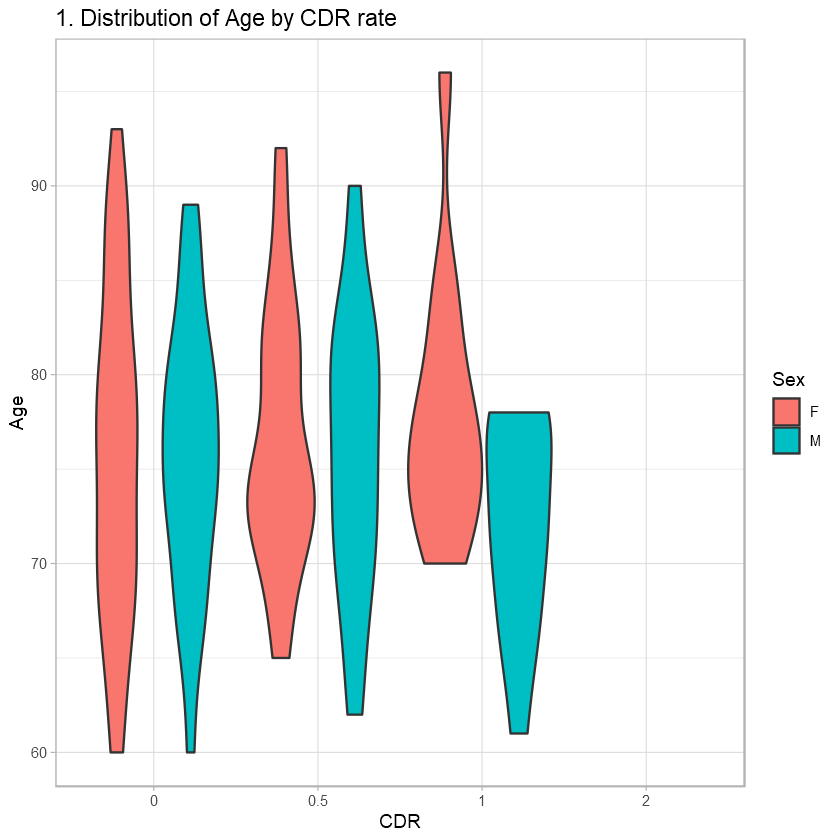

In [10]:
################## Exploratory Data Analysis###########
#Class of **CDR** (0/0.5/1/2) will be our predicted value. Let's see how it depends on other variables
######distribution of Age by CDR for sex ###################
data %>%
  select(Subject.ID, Age, CDR, M.F) %>%
  group_by(Subject.ID, CDR, M.F) %>%
  summarise_all(funs(min)) %>%
  as.data.frame() %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = Age, fill = M.F)) + 
  geom_violin() +
  labs(title = "1. Distribution of Age by CDR rate",
       fill = "Sex") +
  theme_light()

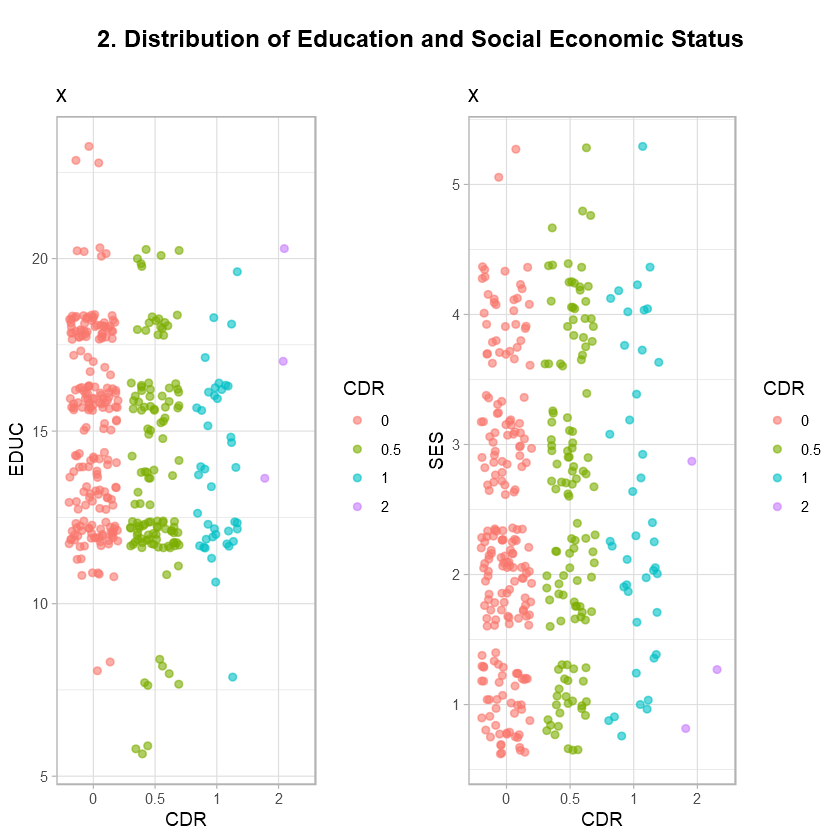

In [11]:
#############Distribution of Education and Social Economic Status by CDR 
x <- data %>%
  select(EDUC, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = EDUC)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

y <- data %>%
  select(SES, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = SES)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

p <- plot_grid(x, y) 
title <- ggdraw() + draw_label("2. Distribution of Education and Social Economic Status", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

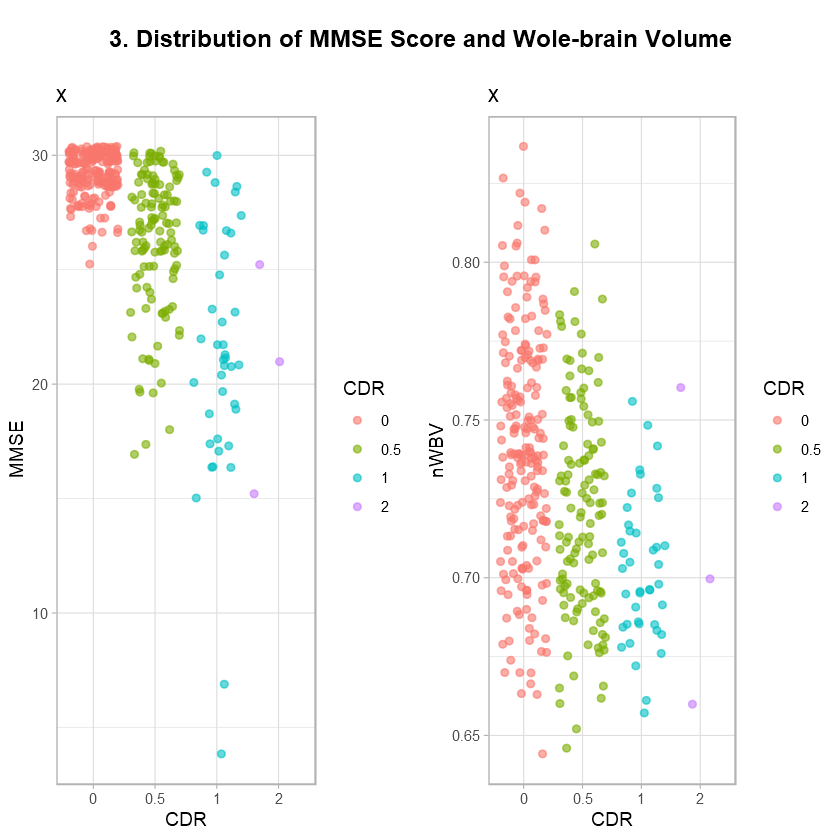

In [12]:
###############Distribution of MMSE Score and Wole-brain Volume by CDR############
x <- data %>%
  select(MMSE, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = MMSE)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

y <- data %>%
  select(nWBV, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = nWBV)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

p <- plot_grid(x, y) 
title <- ggdraw() + draw_label("3. Distribution of MMSE Score and Wole-brain Volume", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

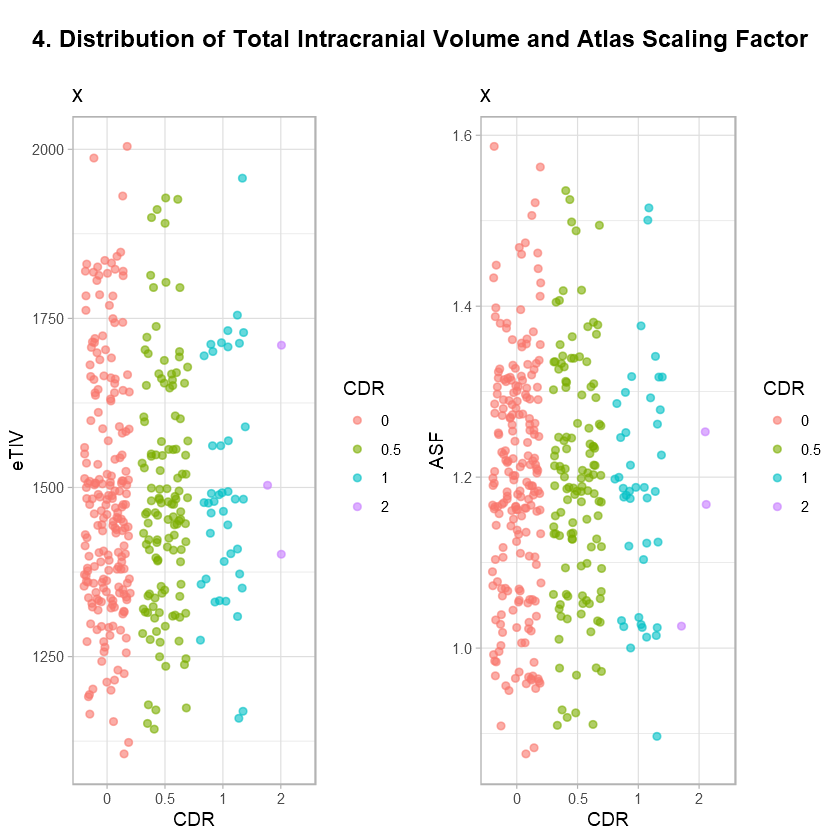

In [13]:
###################Distribution of Total Intracranial Volume and Atlas Scaling Factor by CDR#########################3
x<- data %>%
  select(eTIV, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = eTIV)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

y <- data %>%
  select(ASF, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = ASF)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

p <- plot_grid(x, y) 
title <- ggdraw() + draw_label("4. Distribution of Total Intracranial Volume and Atlas Scaling Factor", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

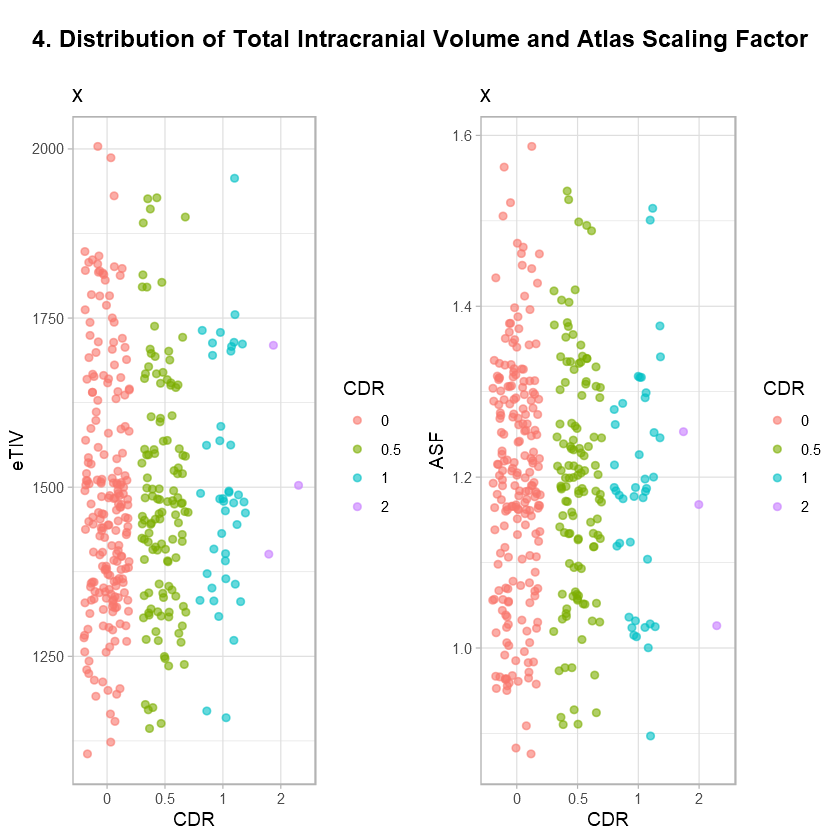

In [19]:
###################Distribution of Total Intracranial Volume and Atlas Scaling Factor by CDR#########################3
x<- data %>%
  select(eTIV, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = eTIV)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

y <- data %>%
  select(ASF, CDR, M.F) %>%
  mutate(CDR = as.factor(CDR)) %>%
  ggplot(aes(x = CDR, y = ASF)) + 
  geom_jitter(aes(col = CDR), alpha = 0.6) +
  labs(title = "x") +
  theme_light()

p <- plot_grid(x, y) 
title <- ggdraw() + draw_label("4. Distribution of Total Intracranial Volume and Atlas Scaling Factor", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

In [15]:
### Preparation and splitting the data###########
data_new <- data %>%
  select(M.F, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF, CDR) %>%
  mutate(CDR = as.factor(CDR))
n_train <- round(0.8 * nrow(data_new))
train_indices <- sample(1:nrow(data_new), n_train) #creating a vector with random indices
train <- data_new[train_indices, ] #generating train data set (with ideces = train_indices)
test <- data_new[-train_indices, ] #generating test data set
formula <- CDR ~ M.F + Age + EDUC + SES + MMSE + eTIV + nWBV

######Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
####Let's train a simple decision tree model and print output for that model to find the best CP value using cross validation. The complexity parameter (CP) is used to control the size of the decision tree and to select the optimal tree size. So lets iterrate and find the optimum CP
opt_cp <- 0 #list with optimal CP parameters
k <- 5
splitPlan <- kWayCrossValidation(nrow(data_new), k, NULL, NULL) #generating 5-folds cross validation plan This function is  a part of vtreat library
for(i in 1:k) {
  split <- splitPlan[[i]]
  #training simple decision tree model
  model_cv <- rpart(formula = formula,
                    data = data_new[split$train,],
                    method = "class")
  #get the best CP value
  opt_cp[i] <- model_cv$cptable[which.min(model_cv$cptable[,"xerror"]),"CP"]
}

#training the model with optimal CP parameter on whole data set
model_dt <- rpart(formula = formula,
                  data = data_new,
                  method = "class",
                  cp = mean(opt_cp))

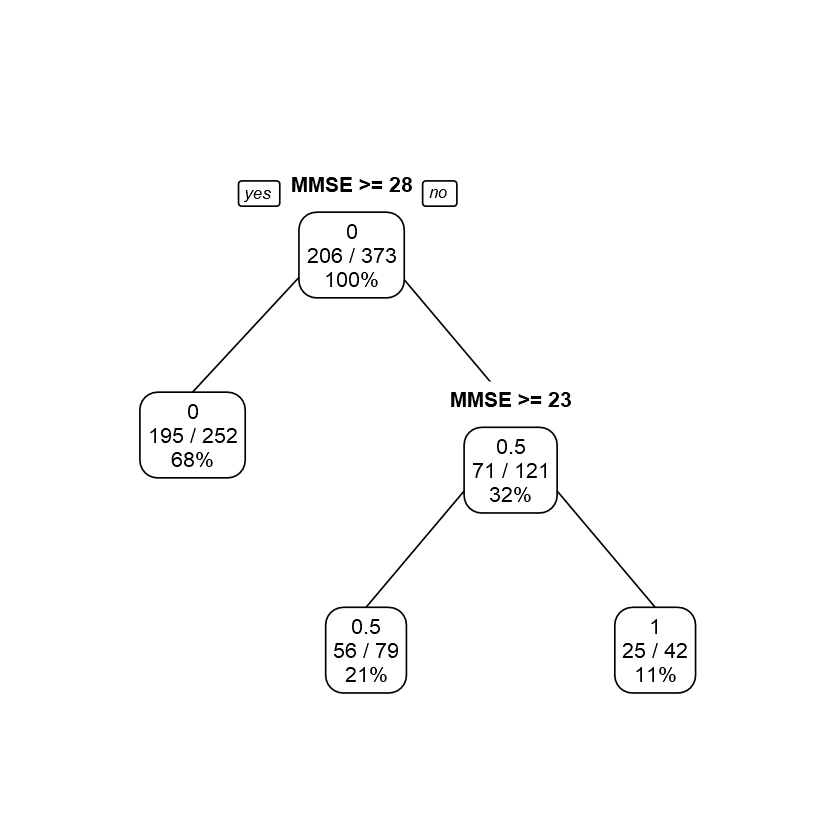

In [16]:
#plot decision tree model
prp(x = model_dt, type=1, extra = 102) # this plots an rpart model

#testing the model
prediction_dt <- predict(object = model_cv,
                         newdata = data_new,
                         type = "class")

In [17]:
#print confusion matrix
confusionMatrix(data = prediction_dt,
                reference = data_new$CDR)

AUC_dt <- Metrics::auc(actual = data_new$CDR, predicted = prediction_dt)
print(AUC_dt)

Confusion Matrix and Statistics

          Reference
Prediction   0 0.5   1   2
       0   194  44   8   0
       0.5  12  75  13   2
       1     0   4  20   1
       2     0   0   0   0

Overall Statistics
                                         
               Accuracy : 0.7748         
                 95% CI : (0.729, 0.8162)
    No Information Rate : 0.5523         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5816         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 0 Class: 0.5 Class: 1 Class: 2
Sensitivity            0.9417     0.6098  0.48780 0.000000
Specificity            0.6886     0.8920  0.98494 1.000000
Pos Pred Value         0.7886     0.7353  0.80000      NaN
Neg Pred Value         0.9055     0.8229  0.93966 0.991957
Prevalence             0.5523     0.3298  0.10992 0.008043
Detection Rate         0.5201     0.2011  0.05362 0.000000
Detection Prevalence

[1] 0.8238686



Call:
 randomForest(formula = formula, data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.5%
Confusion matrix:
      0 0.5 1 2 class.error
0   153  14 0 0  0.08383234
0.5  29  63 6 1  0.36363636
1     2  19 9 0  0.70000000
2     0   1 1 0  1.00000000


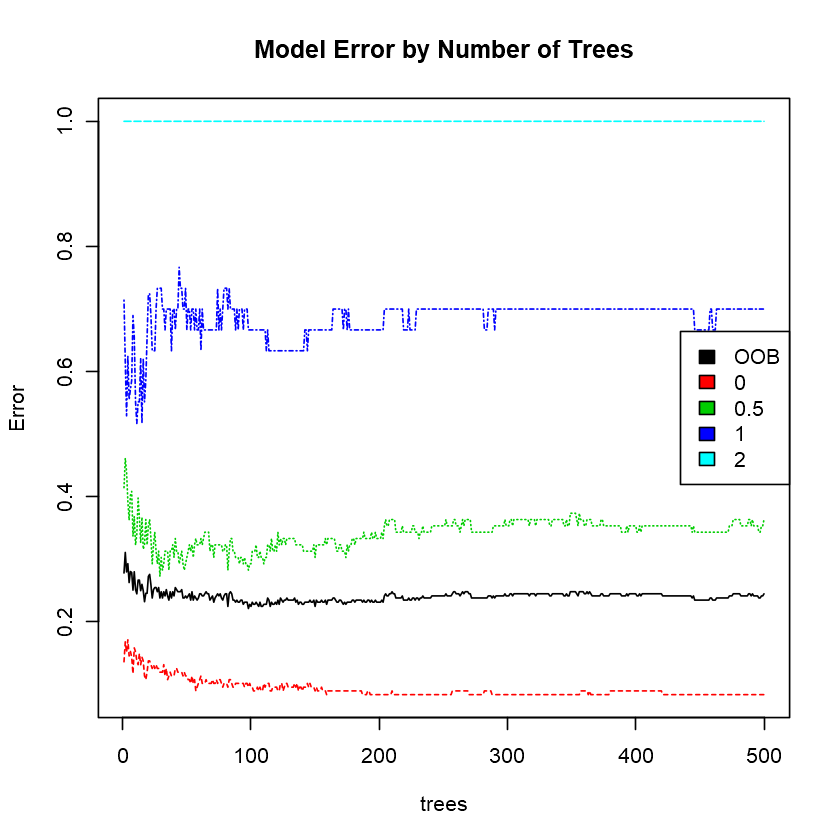

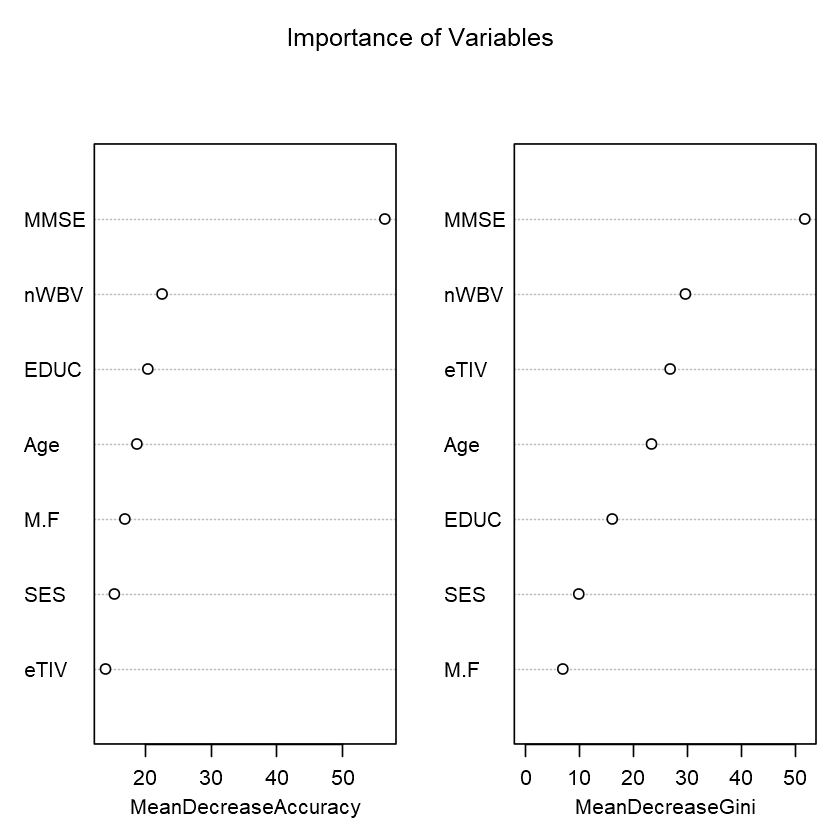

In [18]:
#Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.
#In Random Forest, we grow multiple trees as opposed to a single tree in CART model. To classify a new object based on attributes, each tree gives a classification and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.
### ####################Random Forest###########################
#training with random forest model
model_rf0 <- randomForest(formula = formula,
                          data = train,
                          importance=TRUE)

# Print the model output                             
print(model_rf0)
plot(model_rf0, main = "Model Error by Number of Trees")
legend(x = "right", 
       legend = colnames(model_rf0$err.rate),
       fill = 1:ncol(model_rf0$err.rate))
varImpPlot(model_rf0, main = "Importance of Variables") #plot variance importance

In [19]:
###Now the predicted object
prediction_rf0 <- predict(object = model_rf0,
                         newdata = select(test, -CDR),
                         type = "class")

confusionMatrix(data = prediction_rf0, reference = test$CDR) 

AUC_rf0 <- Metrics::auc(actual = test$CDR, predicted = prediction_rf0)  
print(AUC_rf0)

Confusion Matrix and Statistics

          Reference
Prediction  0 0.5  1  2
       0   37  10  0  0
       0.5  2  14  3  1
       1    0   0  8  0
       2    0   0  0  0

Overall Statistics
                                          
               Accuracy : 0.7867          
                 95% CI : (0.6768, 0.8729)
    No Information Rate : 0.52            
    P-Value [Acc > NIR] : 1.656e-06       
                                          
                  Kappa : 0.6278          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 0.5 Class: 1 Class: 2
Sensitivity            0.9487     0.5833   0.7273  0.00000
Specificity            0.7222     0.8824   1.0000  1.00000
Pos Pred Value         0.7872     0.7000   1.0000      NaN
Neg Pred Value         0.9286     0.8182   0.9552  0.98667
Prevalence             0.5200     0.3200   0.1467  0.01333
Detection Rate         0.4933     0.1867   0.1067  0.00000
Detection Prevalence   0.62

[1] 0.9637784


#############Finding optimal hyperparameters to tune the model##################
#The hyper parameters are 
#1>mtry: Number of variables randomly sampled as candidates at each split.
#2>nodesize: It refers to how many observations we want in the terminal nodes. This parameter is directly related to tree depth. Higher the number, lower the tree depth. With lower tree depth, the tree might even fail to recognize useful signals from the data.
#3>sampsize*: Size(s) of sample to draw. For classification, if sampsize is a vector of the length the number of strata, then sampling is stratified by strata, and the elements of sampsize indicate the numbers to be drawn from the strata.


In [20]:
mtry <- seq(4, ncol(train), 2)
nodesize <- seq(3, 8, 2)
sampsize <- as.integer(nrow(train) * c(0.7, 0.8, 0.9))
hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize) #create a data frame containing all combinations 3*3*3 ie 27 combinations

In [25]:
str(hyper_grid)## this is basically a structure of 27 rows with different permutations of 3 variable values

'data.frame':	27 obs. of  3 variables:
 $ mtry    : num  4 6 8 4 6 8 4 6 8 4 ...
 $ nodesize: num  3 3 3 5 5 5 7 7 7 3 ...
 $ sampsize: int  208 208 208 208 208 208 208 208 208 238 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : Named int  3 3 3
  .. ..- attr(*, "names")= chr  "mtry" "nodesize" "sampsize"
  ..$ dimnames:List of 3
  .. ..$ mtry    : chr  "mtry=4" "mtry=6" "mtry=8"
  .. ..$ nodesize: chr  "nodesize=3" "nodesize=5" "nodesize=7"
  .. ..$ sampsize: chr  "sampsize=208" "sampsize=238" "sampsize=268"


In [26]:
oob_err <- c() ### Create an empty vector to store OOB error values

In [27]:
#write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:nrow(hyper_grid)) {
  #train a Random Forest model
  model_rf <- randomForest(formula = formula,
                           data = train,
                           mtry = hyper_grid$mtry[i],
                           nodesize = hyper_grid$nodesize[i],
                           sampsize = hyper_grid$sampsize[i])
  
  #store OOB error for the model                      
  oob_err[i] <- model_rf$err.rate[nrow(model_rf$err.rate), "OOB"]
}

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"

In [28]:
#identify optimal set of hyperparmeters based on OOB error
opt_i <- which.min(oob_err)
print(opt_i) # the index of the element in the vector which has min OOB error
#We got following hyperparameters:
#mtry* = hyper_grid$mtry[opt_i] nodesize =hyper_grid$nodesize[opt_i] sampsize =hyper_grid$sampsize[opt_i]
#Re-train the model with new parameters

[1] 20


In [29]:
model_rf_final <- randomForest(formula = formula,
                               data = train,
                               mtry = hyper_grid$mtry[opt_i],
                               nodesize = hyper_grid$nodesize[opt_i],
                               sampsize = hyper_grid$sampsize[opt_i])

In [30]:
prediction_rf_final <- predict(object = model_rf_final,
                          newdata = select(test, -CDR),
                          type = "class")

In [31]:
confusionMatrix(data = prediction_rf_final, reference = test$CDR) 

AUC_rf_final <- Metrics::auc(actual = test$CDR, predicted = prediction_rf_final)  #calculating AUC #gives 0.8466
print(AUC_rf_final)

Confusion Matrix and Statistics

          Reference
Prediction  0 0.5  1  2
       0   36  11  0  0
       0.5  3  13  4  1
       1    0   0  7  0
       2    0   0  0  0

Overall Statistics
                                         
               Accuracy : 0.7467         
                 95% CI : (0.633, 0.8401)
    No Information Rate : 0.52           
    P-Value [Acc > NIR] : 4.826e-05      
                                         
                  Kappa : 0.5562         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 0 Class: 0.5 Class: 1 Class: 2
Sensitivity            0.9231     0.5417  0.63636  0.00000
Specificity            0.6944     0.8431  1.00000  1.00000
Pos Pred Value         0.7660     0.6190  1.00000      NaN
Neg Pred Value         0.8929     0.7963  0.94118  0.98667
Prevalence             0.5200     0.3200  0.14667  0.01333
Detection Rate         0.4800     0.1733  0.09333  0.00000
Detection Prevalence   0.6267     0

[1] 0.9517045


[1] "AUC for Decision Tree Model = 0.8239"
[1] "AUC for Random Forest Initial Model = 0.9638"
[1] "AUC for Random Forest Final Model = 0.9517"


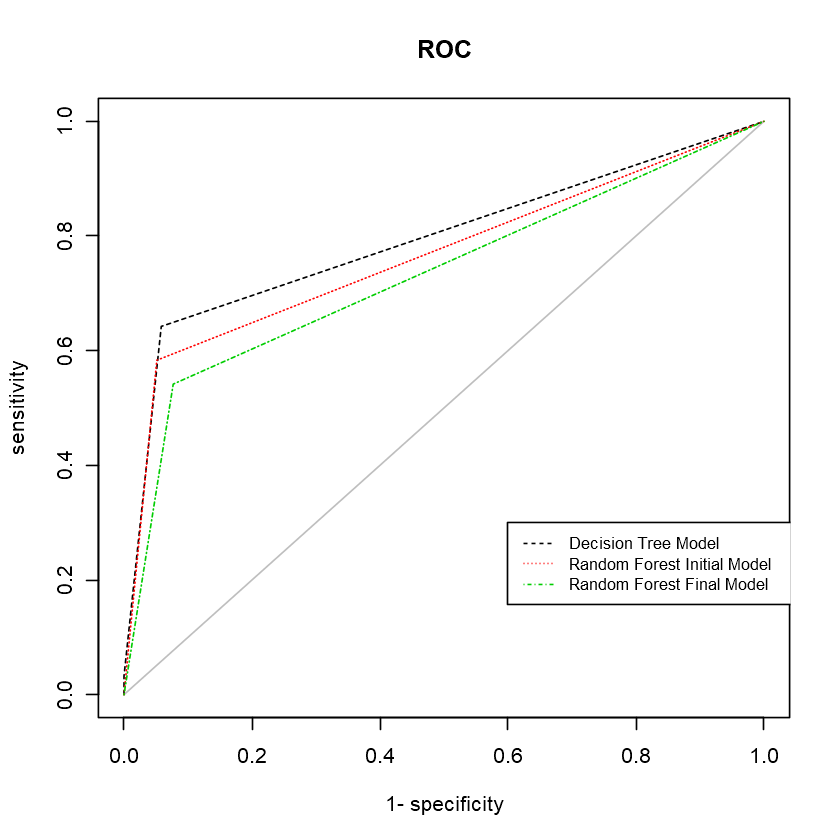

In [32]:
##################AUC Comparison######################
roc1 = AUC::roc(prediction_dt, data_new$CDR)
roc2 = AUC::roc(prediction_rf0, test$CDR)
roc3 = AUC::roc(prediction_rf_final, test$CDR)
plot(roc1, col = 1, lty = 2, main = "ROC")
plot(roc2, col = 2, lty = 3, add = TRUE)
plot(roc3, col = 3, lty = 4, add = TRUE)
print(paste0("AUC for Decision Tree Model = ", round(AUC_dt, 4)))
print(paste0("AUC for Random Forest Initial Model = ", round(AUC_rf0, 4)))
print(paste0("AUC for Random Forest Final Model = ", round(AUC_rf_final, 4)))
legend(0.6, 0.3, legend=c("Decision Tree Model", "Random Forest Initial Model", "Random Forest Final Model"),
       col=c(1,2,3,4), lty=2:5, cex=0.8)
